In [1]:
#This program contains the class CFKinfty as well as some accompanying code to construct standard examples
#We now describe the main methods for the user.
    #The main object is the class CFKinfty.
    #To initialize a CFKinfty object, one passes two lists, gen and diff.
    #The ith entry of gen is a two element list [gr_w(x_i), A(x_i)], where x_0, ..., x_n
    #is an enumeration of the point in Ta\cap Tb.
    #diff is a list of integer lists. diff[i] should contain j
    #iff there is a Maslov index 1 disk from x_i to x_j,

    #An example of instantiating a CFKinfty class is the following:
    
        #genFig8=[[0,0],[0,0],[-1,-1],[1,1],[0,0]]
        #diffFig8=[[],[2,3],[4],[4],[]]
        #Fig8=CFKinfty(genFig8,diffFig8)
    
    #Main attributes of the CFKinfty class:
        #gen
            #the list of generators which is passed when instantiating
        #diff
            #the differential which is passed in
        #rank
            #the number of generators
        #Phi
            #a list
            # Phi[i] is the list of j such that Phi(x_i) contains a summand of y_j with some powers of variables.
            #Phi is the map obtained by applying "d/d U" to the differential, written as a matrix with entries in F[U,V]
        #Psi
            #similar to Phi, but with "d/dV"
        
        #If C is a CFKinfty complex, then an attribute is viewed by typing "C.gen" and pressing enter.
        
    #Methods of the CFKinfty class
        
        #If C is a CFKinfty complex, then C.dual() is the dual
        
        #If C1 and C2 are two CFKinfty complexes, then C1.tensor(C2) is the tensor product CFKinfty complex.
        
        
        #The program views a map from F[U,V] to CFK^infty(K) as a list of indices
        # the list T=[0,2] means the sum of x_0 U^{i_0}V^{j_0}+ x_2 U^{i_2}V^{j_2} for the
        #unique i_0, j_0, i_1 and j_2 which put the expression into Maslov and Alexander grading zero
        #implicitly, we are always assuming that x_0 and x_2 are in mod 2 grading 0.
        
        #T will usually correspond to the element t_{D_1}(1)-t_{D_2}(1)
        
        #C.V0(T)
            #input is a list T, as above
            #returns an integer V_0(T)
        #C.Vk(T,n)
            #T is a list, n is a positive integer, returns integer V_n(T)
        #C.V(T)
            #returns the list [V_0(T),...V_k(T), V_{k+1}(T)] where $V_{k+1}(T)$ is the first local
            #h-invariant which is zero
        #C.tau(T)
            #returns the integer tau
        #C.Upsilon(T,t)
            #t is a number in [0,2]
            #returns a real number
        #C.UpsilonCoordinates(T,k)
            #k is a positive integer
            #returns a list of elements of the form [i/k, Upsilon_T(i/k)] where i is in {0,1,...,2k}
        #C.PlotUpsilon(T,k)
            #k positive integer
            #returns a plot of the Upsilon function, evaluated at the points i/k for i in {0,1,...,2k}
     
    #Additional methods
        # rotatespuninfty(C)
            #returns a pair [C',T] where C' is a new CFKinfty complex, corresponding to K#K#K*#K* and T is
            #a list corresponding to the map which is the difference between the t_D's of the canonical slice disk,
            #and the deform spun slice disk for the pi radian rotation of K#K
        # rollspun(C)
            #returns a pair [C',T] where C is a new CFKinfty complex, corresponding to K#K* and T
            #is the difference between the t_D's of the canonical slice disk and the 1-roll spun slice disk.

class CFKinfty(object):
    #gen should be a list of 2 element lists of the form [M,A] where M is the Maslov (gr_w) grading
    #A is the Alexander grading
    #gen should be the Maslov and Alexander gradings of the intersection points in T_a\cap T_b
    #diff is a list of lists. diff[i] is a list of integers. j is in diff[i] if the total count of index 1 disks going from
    #x_i to x_j is 1 mod 2.
    #Total length of diff should be the rank=the number of generators.
    #indexing starts at 0
    def __init__(self, gen, diff):
        self.gen=gen
        self.diff=diff
        self.rank=len(gen)
        #C0 is the list of generators in grading 0
        #it's a list of elements of the form [n,i,j]
        #n is the original index, and i and j are the bifiltrations
        #note bilfiltrations are the polynomial convention (opposite Ozsvath-Szabo convention)
        #so [n,i,j] means x_n U^i V^j
        #C1 is the list of generators in grading 1.
        #this part of the code builds C0 and C1
        C0=[]
        C1=[]
        for i in range(self.rank):
            L=self.gen[i]
            Mw=L[0]
            A=L[1]
            if Mw%2==1:
                x=[i,(Mw-1)/2, (Mw-2*A-1)/2]
                C1.append(x)
            if Mw%2==0:
                x=[i,Mw/2, (Mw-2*A)/2]
                C0.append(x)
        self.C0=C0
        self.C1=C1
        #rank0 and rank1 are the ranks of C0 and C1
        self.rank0=len(C0)
        self.rank1=len(C1)
        C0ind=[]
        for x in C0:
            C0ind.append(x[0])
        self.C0ind=C0ind
        Alex=[]
        Mas=[]
        for i in range(self.rank):
            Alex.append(gen[i][1])
            Mas.append(gen[i][0])
        #Alex and Mas are just the 0 and 1 components of the components of gen
        self.Alex=Alex
        self.Mas=Mas
        
        self.Phi=[]
        self.Psi=[]
        for i in range(self.rank):
            x=self.gen[i]
            Phix=[]
            Psix=[]
            for j in self.diff[i]:
                y=self.gen[j]
                if ((x[0]-y[0]-1)/2)%2==1:
                    Phix.append(j)
                if ((x[0]-2*x[1]-y[0]+2*y[1]-1)/2)%2==1:
                    Psix.append(j)
            self.Phi.append(Phix)
            self.Psi.append(Psix)
    
        
        
        
    #T is the difference between the two maps tD_1 and tD_2
    #T is a list of integers, corresponding to the x_i (with original indices)
    # which have non-zero component in (tD1-tD2)(1)
    # T is assumed to be in grading 0.
    #powers of U are filled in by the program.
    def V0(self,T):
        #instead of multiplying by powers of U, we expand which elements of C1 contribute to the differential from C1 to C0.
        # we consider intersection points [x,i,j] with i>=-shift and j>=-shift.
        #C1_remain consists of the remaining intersection points which haven't been considered.
        C1_remain=copy(self.C1)
        shift=0
        #deleted is the number of entries of C1 which have been added to C1k
        #deleted will be equal to the number of intersection 
        #points [x,i,j] in grading 1 with i\ge -shift and j\ge -shift
        deleted_tot=0
        #we now make T into a vector of in F^(rank0)
        T0=vector(GF(2), self.rank0, sparse=true)
        if T0==vector(GF(2), self.rank0,sparse=true):
            return 0
        for y in T:
            T0+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true)        
        #Ds is the matrix for the differential restricted to Diff1(i>=-shift, j>=-shift)
        Ds=matrix(GF(2),len(self.C0),0, sparse=true)
        #we now build Ds for shift=0
        while deleted_tot<self.rank1:
            deleted_shift=0
            for i in range(len(C1_remain)):
                x=C1_remain[i-deleted_shift]
                if x[1]>=-shift and x[2]>=-shift:
                    C1_remain.pop(i-deleted_shift)
                    deleted_shift+=1
                    deleted_tot+=1
                    vectordiffx=vector(GF(2),self.rank0,sparse=true)
                    for y in self.diff[x[0]]:
                        vectordiffx+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true)
                    Ds=Ds.augment(vectordiffx)
            #PivotsAugmented is the list of pivot columns of the augmented matrix (Ds|T0)
            PivotsAugmented=Ds.augment(T0).pivots()
            NumPivots=len(PivotsAugmented)
            if NumPivots>0:
                if PivotsAugmented[len(PivotsAugmented)-1]!=deleted_tot:
                    return shift
            shift+=1
        return "T does appear to be a boundary"
    #computes Vk(T)
    #the code is basically the same as V0, but with a slight tweak.
    #def Vk(self,T,k):
    def Vk(self,T,k):
        #instead of multiplying by powers of U, we expand which elements of C1 contribute to the differential from C1 to C0.
        # we consider intersection points [x,i,j] with i>=-shift and j>=-shift-k.
        #C1_remain consists of the remaining intersection points which haven't been considered.
        C1_remain=copy(self.C1)
        shift=0
        #deleted is the number of entries of C1 which have been added to C1k
        #deleted will be equal to the number of intersection 
        #points [x,i,j] in grading 1 with i\ge -shift and j\ge -shift-k
        deleted_tot=0
        #we now make T into a vector of in F^(rank0)
        T0=vector(GF(2), self.rank0, sparse=true)
        for y in T:
            T0+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true)        
        #Ds is the matrix for the differential restricted to Diff1(i>=-shift, j>=-shift-k)
        if T0==vector(GF(2), self.rank0,sparse=true):
            return 0
        Ds=matrix(GF(2),len(self.C0),0, sparse=true)
        #we now build Ds for shift=0
        while deleted_tot<self.rank1:
            deleted_shift=0
            for i in range(len(C1_remain)):
                x=C1_remain[i-deleted_shift]
                if x[1]>=-shift and x[2]>=-shift-k:
                    C1_remain.pop(i-deleted_shift)
                    deleted_shift+=1
                    deleted_tot+=1
                    vectordiffx=vector(GF(2),self.rank0,sparse=true)
                    for y in self.diff[x[0]]:
                        vectordiffx+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true)
                    Ds=Ds.augment(vectordiffx)
            #PivotsAugmented is the list of pivot columns of the augmented matrix (Ds|T0)
            PivotsAugmented=Ds.augment(T0).pivots()
            NumPivots=len(PivotsAugmented)
  
            if NumPivots>0:
                if PivotsAugmented[len(PivotsAugmented)-1]!=deleted_tot:
                    return shift
            shift+=1
        return "T does appear to be a boundary"
    
    #returns the tuple [V0,V1,V2,... ,0]
    def V(self,T):
        nonzero=true
        V=[]
        index=0
        while(nonzero):
            V_index=self.Vk(T,index)
            V.append(V_index)
            index+=1
            if V_index<=0:
                nonzero=false
        return V
    
    #t is a real number in [0,2]
    def Upsilon(self,T,t):
        T0=vector(GF(2), self.rank0, sparse=true)
        for y in T:
            T0+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true) 
        if T0==vector(GF(2), self.rank0,sparse=true):
            return 0
        #C1trem is a list of elements of the form [n,s] corresponding to an intersection point in C1
        # n is the original index from gen.
        # s is (t/2) i+(1-t/2)j
        #the entries will be deleted as the terms are added to the differential 
        C1tRemain=[]
        for L in self.C1:
            C1tRemain.append([L[0],(t/2)*L[1]+(1-t/2)*L[2]])
        C1tRemain=sorted(C1tRemain,key=lambda entry: entry[1],reverse=true)
        #intersection points will be removed from C1tRemain in the order of their second component
        #tfiltlevel denotes the current filtration level.
        tfiltlevel=C1tRemain[0][1]
        #D is the matrix denoting the differential, initialized with zero columns and rank0 rows
        D=matrix(GF(2),len(self.C0),0, sparse=true)
        while len(C1tRemain)>0:
            x=C1tRemain.pop(0)
            vectordiffx=vector(GF(2),self.rank0,sparse=true)
            for y in self.diff[x[0]]:
                vectordiffx+=vector(GF(2), self.rank0, {self.C0ind.index(y):1}, sparse=true)
            D=D.augment(vectordiffx)
            previousfiltration=tfiltlevel
            if len(C1tRemain)>0:
                tfiltlevel=C1tRemain[0][1]
            if tfiltlevel<0 and tfiltlevel!=previousfiltration or len(C1tRemain)==0:
                #PivotsAugmented is the list of pivot columns of the augmented matrix (D|T0)
                PivotsAugmented=D.augment(T0).pivots()
                NumPivots=len(PivotsAugmented)
                if NumPivots>0 and PivotsAugmented[NumPivots-1]!=D.ncols():
                        return -previousfiltration
        return "Error"
    #returns a list of elements of the form [i/k, Upsilon_T(t)] where i is in {0,1,...,2k}
    #k is an integer
    #Computes Upsilon at i/k for i in {1/k,..., 1} and uses symmetry and basic properties to fill in rest
    def UpsilonCoordinates(self,T,k):
        L=[[0,0]]
        for i in range(1,k+1):
            L.append([i/k,self.Upsilon(T,i/k)])
        for i in range(k):
            L.append([(k+i+1)/k,L[k-1-i][1]])
        return L
    def PlotUpsilon(self,T,k):
        from sage.plot.point import Point
        L=self.UpsilonCoordinates(T,k)
        P=point(L)
        return plot(P)
    

    
    
    
    
    def tensor(self,Comp):
        newgen=[]
        newdiff=[]
        newAlex=[]
        newMas=[]
        r1=self.rank
        r2=Comp.rank
        for i in self.Mas:
            for j in Comp.Mas:
                newMas.append(i+j)
        for i in self.Alex:
            for j in Comp.Alex:
                newAlex.append(i+j)
        newgen=zip(newMas,newAlex)
        for n in range(len(self.diff)):
            D1=self.diff[n]
            for m in range(len(Comp.diff)):
                D1D2=[]
                D2=Comp.diff[m]
                for y1 in D1:
                    D1D2.append(y1*r2+m)
                for y2 in D2:
                    D1D2.append(n*r2+y2)
                newdiff.append(D1D2)
        return CFKinfty(newgen,newdiff)
    def dual(self):
        newgen=[[-x for x in y] for y in self.gen]
        newdiff=[[] for x in self.diff]
        for j in range(len(self.diff)):
            L=self.diff[j]
            for i in L:
                newdiff[i].append(j)
        return CFKinfty(newgen,newdiff)

    #diffUto0returns is a list of integer lists. Length is rank(C)
    #it corresponds to the differential on the complex obtained by setting U=0.
    def diffUto0(self):
        diffUto0=[]
        for i in range(len(self.gen)):
            x=self.gen[i]
            diffUto0x=[]
            for j in self.diff[i]:
                y=self.gen[j]
                if x[0]-y[0]==1:
                    diffUto0x.append(j)
            diffUto0.append(diffUto0x)
        return diffUto0
   
    ##returns tau of the complex with the element T
    def tau(self, T):
        #C0hat and C1hat are just the lists of intersection points which are in grading 0 or 1
        C1hat=[]
        C0hat=[]
        for i in range(self.rank):
            gr=self.Mas[i]
            if gr==0:
                C0hat.append(i)
            if gr==1:
                C1hat.append(i)
        diffhat=self.diffUto0()
        #diff1 is a reindexing of diffhat, in the bases of C0hat and C1hat.
        #diff1 is a list of len(C1hat) lists. 
        #The i^th sublist consists of the y_i in C0hat where D(x_j) has nonzero coefficient.
        diff1=[]
        for i in C1hat:
            D1new=[]
            D1old=diffhat[i]
            for j in D1old:
                D1new.append(C0hat.index(j))
            diff1.append(D1new)
        #r1 and r0 are the ranks of C0hat and C1hat
        r1=len(C1hat)
        r0=len(C0hat)
        #D an r_0 x r_1 matrix. It is the differential. It is initialized to zero.
        #We iterate over Alexander gradings, adding columns corresponding to int points of Alexander grading i
        #We assume the differential decreases Alexander grading (so it's the V=0 version)
        #We assume that the d(C1hat)subset C0hat
        D=matrix(GF(2), r0,r1, sparse=true)
        #makes D the restriction of diffhat to Alex<=0.
        for i in range(len(C1hat)):
            if self.Alex[C1hat[i]]<=0:
                for j in diff1[i]:
                    D[j,i]+=1
        #makes a vector T0 in R^r0, corresponding to the element T0 in C0hat.
        T0=vector(GF(2),r0, sparse=true)
        for i in T:
            if self.Mas[i]==0:
                indi=C0hat.index(i)
                T0[indi]+=1
        #sees whether T0 is in image of DT0. Computes pivot rows 
        DT0=D.augment(T0)
        Piv=DT0.pivots()
        if len(Piv)>0:
            if len(C1hat)!=Piv[len(Piv)-1]:
                return 0
        for i in range(1,max(self.Alex)+1):
            for j in C1hat:
                if self.Alex[j]==i:
                    jnew=C1hat.index(j)
                    for k in diff1[jnew]:
                        D[k,jnew]+=1
            DT0=D.augment(T0)
            Piv=DT0.pivots()
            if len(Piv)>0:      
                if len(C1hat)!=Piv[len(Piv)-1]:
                    return i
        return "error"
    
    
    
    

#The following is some code outside of the CFKinfty class to help build examples.
    
    
# maptoelement(F) sends the endomorphism F: C to C, the element in C\otimes C*
# code can be modified to word to a map F: A to B, to give the element in B \otimes A*,
# but will need another argument for rank(B)
def endotoelmt(F):
    E=[]
    rank=len(F)
    for i in range(len(F)):
        for y in F[i]:
            E.append(rank*y+i)
    return E
# gives the identity function in list form
def idenfunc(n):
    newmap=[]
    for i in range(n):
        newmap.append([i])
    return newmap
# gives the sum of two maps, in list form. Assumes that F and G have the same number of entries.
def summaps(F,G):
    newmap=[]
    for i in range(len(F)):
        newterm=[]
        newterm.extend(F[i])
        newterm.extend(G[i])
        newterm=mod2(newterm)
        newmap.append(newterm)
    return newmap

def swap(n):
    newmap=[]
    for i in range(n):
        for j in range(n):
            newmap.append([n*j+i])
    return newmap


   #deletes pairs of repeated elements from a list of integers
def mod2(L):
    K=copy(L)
    for x in L:
        if K.count(x)>1:
            K.remove(x)
            K.remove(x)
    return K

#builds the swap map on A\otimes A, as a list. The input n is the rank of A
def composemaps(G,F):
    newmap=[]
    for x in F:
        L=[]
        for y in x:
            L.extend(G[y])
        L=mod2(L)    
        newmap.append(L)
    return newmap


#builds the tensor product of two maps F and G
#on the tensor product of their domains, to the tensor product of their codomains
#rG is the rank of the codomain of G 
def tensormaps(F,G,rG):
    newmap=[]
    for x1 in F:
        for x2 in G:
            T=[]
            for y1 in x1:
                for y2 in x2:
                    T.append(y1*rG+y2)
            newmap.append(T)
    return newmap


        

#returns a pair [C,T] where C is the CFKinfty object for K#K #K*#K* and T is the
# difference of the maps for the the pi/2 rotate-spun slice disk and the canonical slice disk
def rotatespuninfty(K):
    Kdual=K.dual()
    SuperK=K.tensor(K.tensor(Kdual.tensor(Kdual)))
    rank=K.rank
    X=swap(rank)
    PhiPsi=composemaps(K.Phi,K.Psi)
    PhixPsi=tensormaps(K.Phi,K.Psi,rank)
    Ir=idenfunc(rank)
    Ir2=idenfunc(rank^2)
    PhiPsixI=tensormaps(PhiPsi,Ir,rank)
    D=composemaps(X,summaps(Ir2,summaps(PhixPsi,PhiPsixI)))
    T=endotoelmt(summaps(D,Ir2))
    return [SuperK,T]

    #returns the [C,T] where C is the CFKinfty complex for K# K^* and T
    #is the difference of the maps for the 1-rollspin and the canonical slice disk
def rollspun(K):
    KKdual=K.tensor(K.dual())
    rank=K.rank
    PhiPsi=composemaps(K.Phi,K.Psi)
    T=endotoelmt(PhiPsi)
    return [KKdual,T]
    


In [3]:
#some examples built using the T34 torus knot
genT34=[[-6,-3],[-5,-2],[-2,0],[-1,2],[0,3]]
diffT34=[[],[0,2],[],[2,4],[]]
T34=CFKinfty(genT34,diffT34)
# the rotate spun T34#T34
R34big=rotatespuninfty(T34)
R34=R34big[0]
T_R34=R34big[1]
#The 1-rollspin of T34#T34
RollT34T34big=rollspun(T34.tensor(T34))
RollT34T34=RollT34T34big[0]
TRollT34T34=RollT34T34big[1]

In [3]:
#Plotting Upsilon of the 1 rotatespin of T34#T34
P34=R34.PlotUpsilon(T_R34,40)

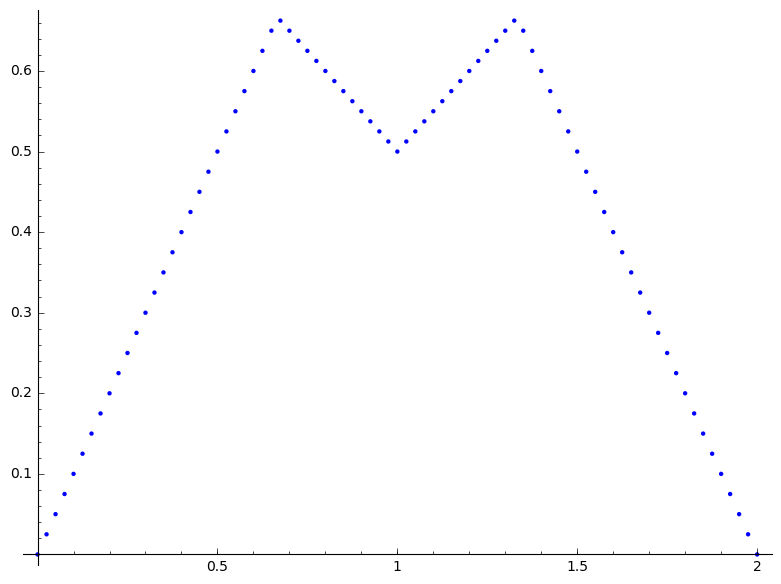

In [7]:
P34.plot()

In [4]:
#tau of the rotate spin of T34#T34
R34.tau(T_R34)

2

In [5]:
#[V_0,V_1,V_2] of the rotate spin of T34#T34
R34.V(T_R34)

[1, 1, 0]

In [7]:
#[V_0,V_1] of the 1-roll spin of T34#T34
RollT34T34.V(TRollT34T34)

[1, 0]

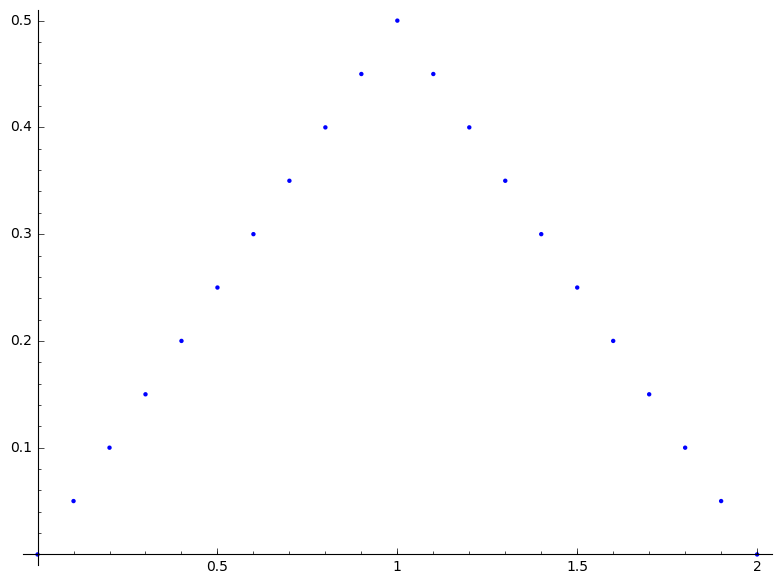

In [8]:
#Upsilon of the 1-roll spin of T34#T34
RollT34T34.PlotUpsilon(TRollT34T34,10)

In [8]:
#The knot complex for T45
genT45=[[-12,-6],[-11,-5],[-6,-2],[-5,0],[-2,2],[-1,5],[0,6]]
diffT45=[[],[0,2],[],[2,4],[],[4,6],[]]
T45=CFKinfty(genT45,diffT45)
#the complex and map for the rotate spin of T45#T45
R45big=rotatespuninfty(T45)
R45=R45big[0]
T_R45=R45big[1]

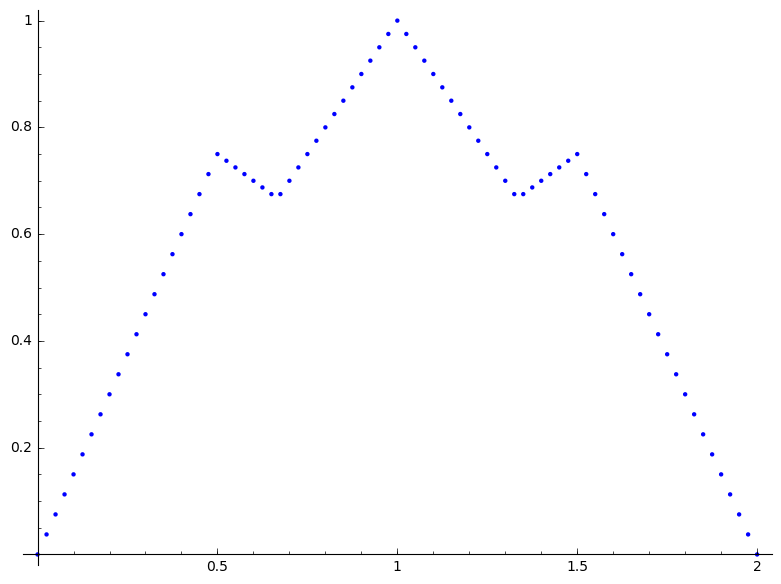

In [10]:
#Upsilon of the rotate spin of T45#T45
R45.PlotUpsilon(T_R45,40)

In [28]:
P.save('UpsilonR45.pdf')

In [11]:
#tau of the rotate spun T45#45
R45.tau(T_R45)

3

In [12]:
R45.V(T_R45)

[2, 1, 1, 0]

In [7]:
#The figure 8 complex  
genFig8=[[0,0],[0,0],[-1,-1],[1,1],[0,0]]
diffFig8=[[],[2,3],[4],[4],[]]
Fig8=CFKinfty(genFig8,diffFig8)
#The rotate spin of Fig8#Fig8
RFig8big=rotatespuninfty(Fig8)
RFig8=RFig8big[0]
T_RFig8=RFig8big[1]

In [14]:
#tau of the rotate spun slice disk for Fig8#Fig8
RFig8.tau(T_RFig8)

1

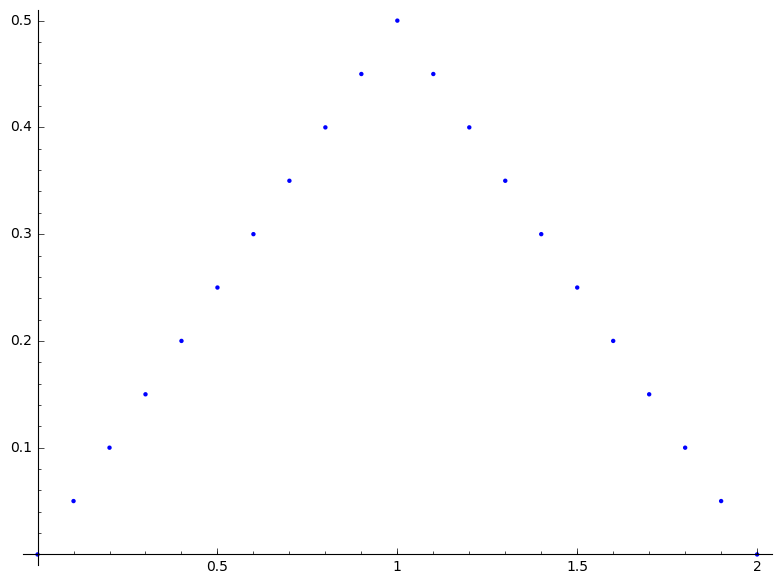

In [15]:
#Upsilon of the rotate spin of Fig8#Fig8
RFig8.PlotUpsilon(T_RFig8,10)

In [15]:
#[V0,V1] of the rotate spin of Fig8#Fig8
RFig8.V(T_RFig8)

[1, 0]

In [8]:
RollFig8big=rollspun(Fig8)
RollFig8=RollFig8big[0]
TRollFig8=RollFig8big[1]

In [15]:
p=RollFig8.PlotUpsilon(TRollFig8,40)

In [17]:
p.save('rollspunfig8upsilon.pdf')

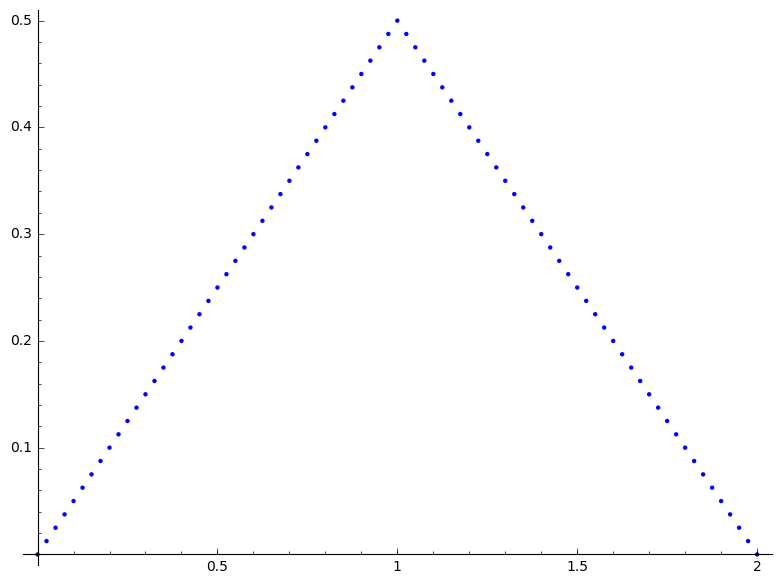

In [14]:
p.plot()

In [9]:
T45T34=T45.tensor(T34)

In [10]:
RollT45T34big=rollspun(T34.tensor(T34))
RollT45T34=RollT34T34big[0]
TRollT45T34=RollT34T34big[1]

In [11]:
RollT45T34.V(TRollT45T34)

[1, 0]

In [12]:
Fig8T45=Fig8.tensor(T45)

In [13]:
Roll8T45big=rollspun(Fig8T45)
Roll8T45=Roll8T45big[0]
TRoll8T45=Roll8T45big[1]

In [14]:
Roll8T45.V(TRoll8T45)

[1, 0]

In [4]:
T34cubed=T34.tensor(T34.tensor(T34))

In [5]:
RT34cubedbig=rollspun(T34cubed)

In [7]:
R=RT34cubedbig[0]
T=RT34cubedbig[1]

In [11]:
R.V(T)

[1, 0]

In [12]:
genT94=[[0,12],[-1,11],[-2,8],[-3,7],[-4,4],[-7,2],[-8,0],[-11,-2],[-12,-4],[-17,-7],[-18,8],[-23,11],[-24,12],]
diffT94=[[],[0,2],[],[2,4],[],[4,6],[],[6,8],[],[8,10],[],[10,12],[]]
T94=CFKinfty(genT94,diffT94)

In [13]:
RollT94big=rollspun(T94)
RT94=RollT94big[0]
TT94=RollT94big[1]

In [14]:
RT94.tau(TT94)

0

In [15]:
RollT94sqbig=rollspun(T94.tensor(T94))
RT94sq=RollT94sqbig[0]
TT94sq=RollT94sqbig[1]

In [16]:
RT94sq.V(TT94sq)

[1, 0]